In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
image = cv2.imread('./train.jpg')

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(408, 612, 3)

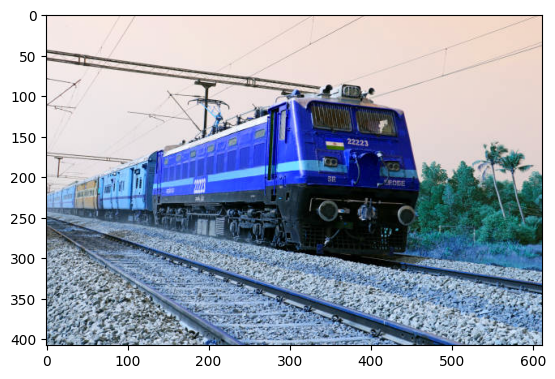

In [5]:
plt.imshow(image)

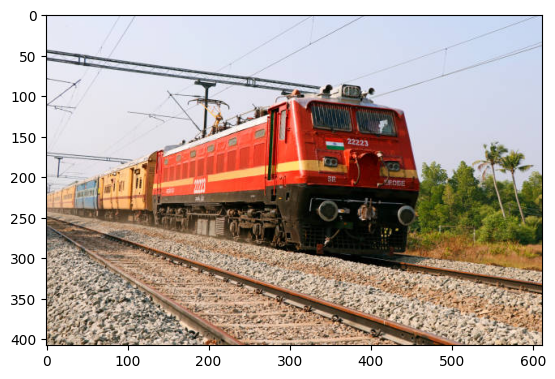

In [6]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [7]:
"""
1. splitting the image
"""
(b,g,r) = cv2.split(new_image)
print('r',r.shape)
print('g',g.shape)    
print('b',b.shape)

r (408, 612)
g (408, 612)
b (408, 612)


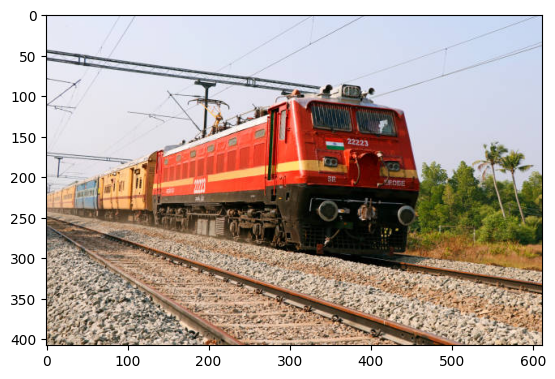

In [8]:
new_image = cv2.merge((b,g,r))
plt.imshow(new_image)

In [9]:
s= 10
w= int(new_image.shape[1]*s/100)
h= int(new_image.shape[0]*s/100)
dim= (w,h)
resized= cv2.resize(new_image, dim, interpolation=cv2.INTER_AREA)
# plt.imshow(resized)
resized.shape

(40, 61, 3)

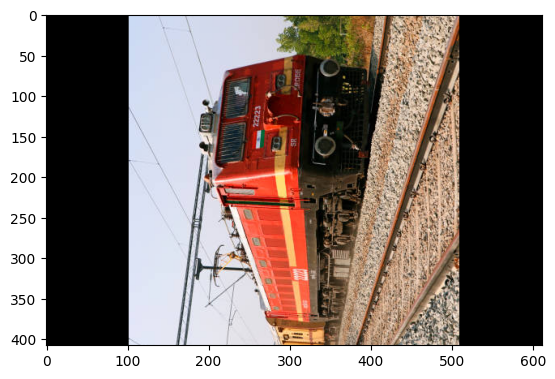

In [10]:
# rotate operation
(h, w) = new_image.shape[:2]
center = (w / 2, h / 2)
angle = 90
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(new_image, M, (w, h))
plt.imshow(rotated)

<h1>CNN</h1>

In [11]:

print("Current working directory:")
print(os.getcwd())

print("\nFiles in this directory:")
print(os.listdir())

Current working directory:
a:\Coding\Py\Object detection

Files in this directory:
['cnn.ipynb', 'object.ipynb', 'object.py', 'train.jpg', 'yolov3 (1).cfg', 'yolov3.weights']


In [12]:
yolo = cv2.dnn.readNetFromDarknet(
    "./yolov3 (1).cfg",
    "./yolov3.weights"
)


In [13]:
classes = []

with open("./coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]  

In [16]:
len(classes)
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [17]:
img= cv2.imread('./bus.jpg')
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416,416), swapRB=True, crop=False)

In [18]:
blob.shape

(1, 3, 416, 416)

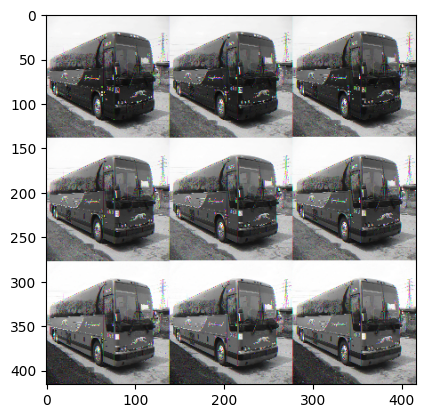

In [23]:
i = blob[0].reshape(416, 416, 3)
i.shape
plt.imshow(i)

In [ ]:
i = blob[0].reshape(416, 416, 3)
i.shape
plt.imshow(i)

In [24]:
yolo.setInput(blob)

In [25]:
output_layers = yolo.getUnconnectedOutLayersNames()
layer_outputs = yolo.forward(output_layers)

In [26]:
boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [27]:
len(boxes)

7

In [28]:
indexex= cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [29]:
fonts= cv2.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255, size=(len(boxes),3))

In [ ]:
for i in indexex:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label + " " + confidence, (x, y + 20), fonts, 2, (255,255,255), 2)

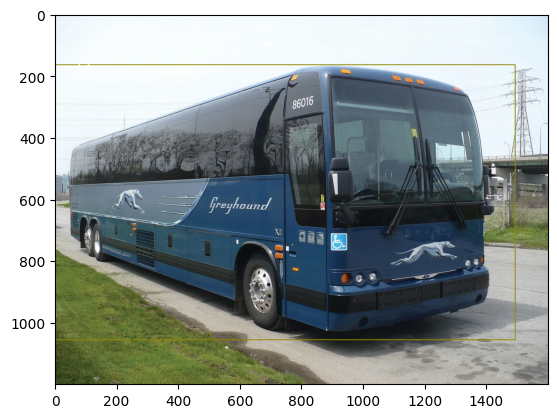

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))